# Model Building 

In [1]:
import pandas as pd # To read csv file as dataframe
# To Draw visualizations
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np


from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules




In [2]:
GS_data = pd.read_csv('orders.csv')
GS_data.shape

(51290, 24)

# 1. Apriori recomendation system

## 1. a. Apriori Algorithm for sub-category

#### The Apriori algorith is first used to find out if there are sub-categories which are regularly bought together and see what the pattern is with those sub-categories.

In [3]:
# Basket based on customer id and sub_category

basket = (GS_data
          .groupby(['customer_id', 'sub_category'])['quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('customer_id'))
basket.head(5)

sub_category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
customer_id,,,,,,,,,,,,,,,,,
AA-10315102,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,3.0,0.0,0.0,0.0,15.0,0.0
AA-10315120,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AA-10315139,0.0,0.0,5.0,9.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,13.0,4.0,0.0,0.0
AA-103151402,7.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0
AA-103151404,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [4]:
# 1-Hotting data so it can be used in market basket model
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    

basket_sets = basket.applymap(encode_units)

frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)

# We will see only rules with 100% confidence when we set 'min threshold' to 1
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Accessories),(Art),0.155900,0.233821,0.041803,0.268140,1.146772,0.005350,1.046892
1,(Art),(Accessories),0.233821,0.155900,0.041803,0.178782,1.146772,0.005350,1.027863
2,(Accessories),(Binders),0.155900,0.279299,0.051335,0.329282,1.178956,0.007792,1.074521
3,(Binders),(Accessories),0.279299,0.155900,0.051335,0.183799,1.178956,0.007792,1.034182
4,(Accessories),(Bookcases),0.155900,0.126098,0.021878,0.140331,1.112875,0.002219,1.016557
...,...,...,...,...,...,...,...,...,...
203,"(Binders, Phones)",(Storage),0.057249,0.243526,0.020844,0.364092,1.495088,0.006902,1.189598
204,"(Storage, Phones)",(Binders),0.047258,0.279299,0.020844,0.441069,1.579198,0.007645,1.289427
205,(Binders),"(Storage, Phones)",0.279299,0.047258,0.020844,0.074630,1.579198,0.007645,1.029579
206,(Storage),"(Binders, Phones)",0.243526,0.057249,0.020844,0.085593,1.495088,0.006902,1.030997


## 1. b. Apriori Algorithm for each product sold

#### The Apriori algorith is then used to find out if there are specific products which are regularly bought together and see what the pattern is with those products in order to use that to make recommendations when someone else makes a purchase.

In [3]:
# Basket based on customer_id and product name

basket = (GS_data
          .groupby(['customer_id', 'product_name'])['quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('customer_id'))
basket

product_name,"""While you Were Out"" Message Book, One Form per Page","#10 Gummed Flap White Envelopes, 100/Box",#10 Self-Seal White Envelopes,"#10 White Business Envelopes,4 1/8 x 9 1/2","#10- 4 1/8"" x 9 1/2"" Recycled Envelopes","#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes","#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes",#6 3/4 Gummed Flap White Envelopes,"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators","1/4 Fold Party Design Invitations & White Envelopes, 24 8-1/2"" X 11"" Cards, 25 Env./Pack",...,Zebra ZM400 Thermal Label Printer,Zebra Zazzle Fluorescent Highlighters,Zipper Ring Binder Pockets,i.Sound Portable Power - 8000 mAh,iHome FM Clock Radio with Lightning Dock,"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",iOttie HLCRIO102 Car Mount,iOttie XL Car Mount,invisibleSHIELD by ZAGG Smudge-Free Screen Protector,netTALK DUO VoIP Telephone Service
customer_id,,,,,,,,,,,,,,,,,,,,,
AA-10315102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AA-10315120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AA-10315139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AA-103151402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AA-103151404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZD-2192548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZD-2192564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZD-219257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 1-Hotting 
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)


In [6]:
basket_sets.to_csv('customer_id_matrix.csv')

In [4]:

# Remove all rows with only one product
#b= basket_sets.transpose()
#b.sum(axis = 0, skipna = True)

column_list = list(basket_sets)
#basket_sets["sum"] = basket_sets[column_list].sum(axis=1)
#basket_sets.drop(basket_sets[basket_sets['sum'] <= 1], inplace = True)
basket_sets= basket_sets.head(50)

frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Logitech diNovo Edge Keyboard),"(ACCOHIDE 3-Ring Binder, Blue, 1"")",0.02,0.02,0.02,1.0,50.0,0.0196,inf
1,"(ACCOHIDE 3-Ring Binder, Blue, 1"")",(Logitech diNovo Edge Keyboard),0.02,0.02,0.02,1.0,50.0,0.0196,inf
2,"(ACCOHIDE 3-Ring Binder, Blue, 1"")",(Portfile Personal File Boxes),0.02,0.02,0.02,1.0,50.0,0.0196,inf
3,(Portfile Personal File Boxes),"(ACCOHIDE 3-Ring Binder, Blue, 1"")",0.02,0.02,0.02,1.0,50.0,0.0196,inf
4,(Xerox 4200 Series MultiUse Premium Copy Paper...,"(ACCOHIDE 3-Ring Binder, Blue, 1"")",0.02,0.02,0.02,1.0,50.0,0.0196,inf


#### Attempt to find recommendations for Portfile Personal File Boxes

In [11]:
r=rules[rules.antecedents.apply(str).str.contains("Portfile Personal File Boxes")].sort_values('antecedents', ascending=False)

In [12]:
r[['antecedents', 'consequents']]

,antecedents,consequents
4185,(Xerox 4200 Series MultiUse Premium Copy Paper...,"(ACCOHIDE 3-Ring Binder, Blue, 1"")"
3879,(Xerox 4200 Series MultiUse Premium Copy Paper...,(Logitech diNovo Edge Keyboard)
4193,"(ACCOHIDE 3-Ring Binder, Blue, 1"", Portfile Pe...",(Xerox 4200 Series MultiUse Premium Copy Paper...
645,"(Logitech diNovo Edge Keyboard, Portfile Perso...","(ACCOHIDE 3-Ring Binder, Blue, 1"")"
646,"(ACCOHIDE 3-Ring Binder, Blue, 1"", Portfile Pe...",(Logitech diNovo Edge Keyboard)
4192,"(Logitech diNovo Edge Keyboard, Portfile Perso...",(Xerox 4200 Series MultiUse Premium Copy Paper...
657,(Xerox 4200 Series MultiUse Premium Copy Paper...,"(ACCOHIDE 3-Ring Binder, Blue, 1"")"
658,"(ACCOHIDE 3-Ring Binder, Blue, 1"", Portfile Pe...",(Xerox 4200 Series MultiUse Premium Copy Paper...
4190,(Xerox 4200 Series MultiUse Premium Copy Paper...,"(Logitech diNovo Edge Keyboard, ACCOHIDE 3-Rin..."
4187,"(Logitech diNovo Edge Keyboard, ACCOHIDE 3-Rin...",(Xerox 4200 Series MultiUse Premium Copy Paper...


In [ ]:
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )

# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))


# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['lhs items']>10].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

# 2. Market Segmentation for product promotion

## 2.a. K Means model

In [10]:
a= GS_data.groupby(['customer_id', 'product_name'])
a.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,postal_code,city,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.770,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,1.010,Medium
51286,34337,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.720,5,0.2,3.3440,1.930,High
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,OFF-AR-5321,Office Supplies,Art,Newell 341,8.560,2,0.0,2.4824,1.580,High
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,OFF-BI-2919,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,1.003,Medium


In [30]:
from sklearn.preprocessing import StandardScaler

X = basket
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.01292567, -0.01451175, -0.01169347, ..., -0.01030473,
        -0.0195037 , -0.01702245],
       [-0.01292567, -0.01451175, -0.01169347, ..., -0.01030473,
        -0.0195037 , -0.01702245],
       [-0.01292567, -0.01451175, -0.01169347, ..., -0.01030473,
        -0.0195037 , -0.01702245],
       ...,
       [-0.01292567, -0.01451175, -0.01169347, ..., -0.01030473,
        -0.0195037 , -0.01702245],
       [-0.01292567, -0.01451175, -0.01169347, ..., -0.01030473,
        -0.0195037 , -0.01702245],
       [-0.01292567, -0.01451175, -0.01169347, ..., -0.01030473,
        -0.0195037 , -0.01702245]])

In [8]:
# determine the number to use for K
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

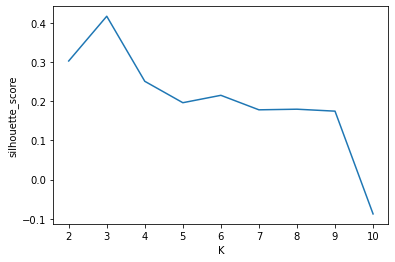

In [29]:
import matplotlib.pyplot

K=[]
for k in range(2, kmax+1):
    K.append(k)
matplotlib.pyplot.plot(K, sil)        # plot x and y using default line style and color
plt.xlabel("K")
plt.ylabel("silhouette_score")

plt.show()

The best K value to use is 3 as it gives the best silhouette score of slightly over 0.4

In [31]:
# Modelling
from sklearn.cluster import KMeans 
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 2 2 ... 2 2 2]


In [32]:
#Labels-We assign labels to each row of data frame
basket["Clus_km"] = labels
basket.head(5)

product_name,"""While you Were Out"" Message Book, One Form per Page","#10 Gummed Flap White Envelopes, 100/Box",#10 Self-Seal White Envelopes,"#10 White Business Envelopes,4 1/8 x 9 1/2","#10- 4 1/8"" x 9 1/2"" Recycled Envelopes","#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes","#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes",#6 3/4 Gummed Flap White Envelopes,"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators","1/4 Fold Party Design Invitations & White Envelopes, 24 8-1/2"" X 11"" Cards, 25 Env./Pack",...,Zebra Zazzle Fluorescent Highlighters,Zipper Ring Binder Pockets,i.Sound Portable Power - 8000 mAh,iHome FM Clock Radio with Lightning Dock,"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",iOttie HLCRIO102 Car Mount,iOttie XL Car Mount,invisibleSHIELD by ZAGG Smudge-Free Screen Protector,netTALK DUO VoIP Telephone Service,Clus_km
customer_id,,,,,,,,,,,,,,,,,,,,,
AA-10315102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
AA-10315120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
AA-10315139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
AA-103151402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
AA-103151404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [ ]:
#Centroid values-We can easily check the centroid values by averaging the features in each cluster.
basket.groupby('Clus_km').describe()